In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
from scipy.optimize import curve_fit

# Linear congruential

$z_{i+1}= (a z_i+b)  \mod (m)$

Satz von Knut:
$a = 1 664 525$, $b = 1013904223$, und $m = 2^{32}$

In [3]:
# class linear congruential
class linearCongruential:
    def __init__(self, a_, b_, m_, seed = 1):
        self.a = a_
        self.b = b_
        self.m = m_
        self.zi = seed
        
    def getRandom(self):
        self.zi = (self.a* self.zi + self.b)%self.m
        return self.zi
    
    def getNormRandom(self):
        return self.getRandom()/self.m

In [4]:
hugo = linearCongruential(4,6,31)
markus = linearCongruential(1664525,1013904223,2**32)

In [5]:
for i in range(10):
    print(hugo.getNormRandom(), '\t', markus.getNormRandom())
    

0.3225806451612903 	 0.23645552527159452
0.4838709677419355 	 0.3692706737201661
0.12903225806451613 	 0.5042420323006809
0.7096774193548387 	 0.7048832636792213
0.03225806451612903 	 0.05054362863302231
0.3225806451612903 	 0.3695183543022722
0.4838709677419355 	 0.7747629624791443
0.12903225806451613 	 0.556188570568338
0.7096774193548387 	 0.0164932357147336
0.03225806451612903 	 0.6392460397910327


In [6]:
reference = hugo.zi

counter = 0
while ( reference != hugo.getRandom() or counter < 100 ):
    counter = counter+1
print("periode = ", counter)

periode =  104


<IPython.core.display.Javascript object>


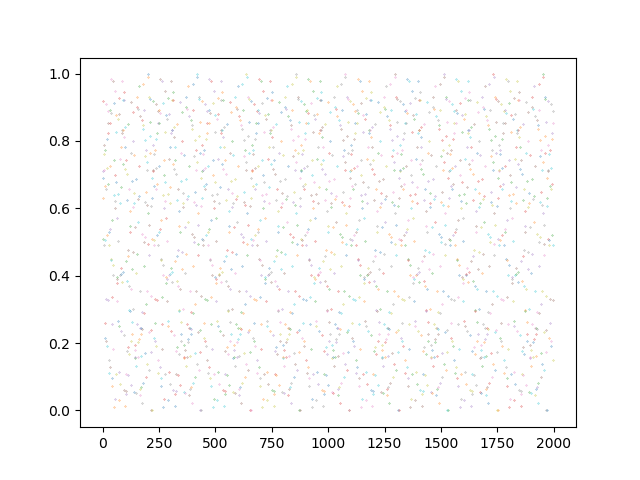

In [7]:
figure()
hugo = linearCongruential(593,588,439)

for i in range(2000):
    plot(i,hugo.getNormRandom(), ".", markersize = 0.5)
show()

# Monte Carlo Integration Calculate Pi
results from David Storch as best practice example

In [8]:
# Class providing the random numbers and the check function for in/out area check
class dart:
    def __init__(self):
        self.x = 0
        self.y = 0
        self.iter = 0
        self.count = 0
        np.random.seed(42)
        
    def throw(self):
        self.x = np.random.uniform(0,1)
        self.y = np.random.uniform(0,1)
        
    def radius(self):
        return np.sqrt(self.x**2+self.y**2)
    
    def update(self):
        self.throw()
        self.iter = self.iter+1
        if self.radius() <= 1: 
            self.count = self.count +1
            
    def piEstimate(self):
        return 4*self.count/self.iter
    
    def piError(self):
        return (self.piEstimate()-np.pi)/np.pi

In [15]:
# PROGRAM
PI = dart()
data_PI = []

n_iter = 10000000
n_step = 100

# run thte simulation ans tore results evey n_step s
for i in range(n_step,n_iter,n_step):
    while(PI.iter < i):
        PI.update()
    data_PI.append(PI.piError())

<IPython.core.display.Javascript object>


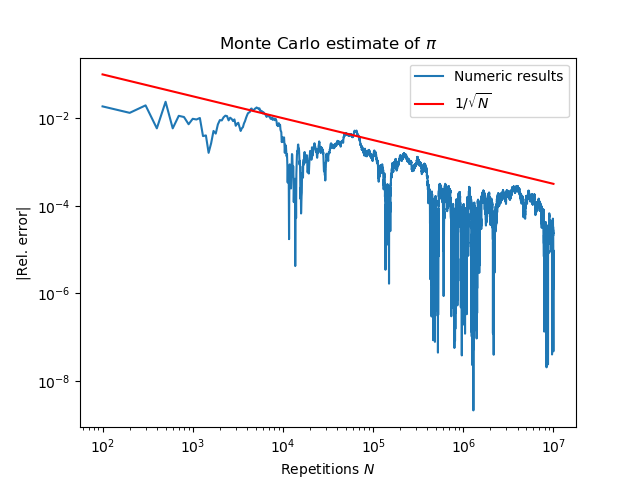

In [16]:
# Analysis
figure()
xscale('log')
yscale('log')
title(r'Monte Carlo estimate of $\pi$')
xlabel(r'Repetitions $N$')
ylabel('|Rel. error|')
plot(range(n_step,n_iter,n_step),np.abs(data_PI),label ='Numeric results')
plot(range(n_step,n_iter,n_step),1/np.sqrt(np.array(range(n_step,n_iter,n_step))),c ='r', label = r'$1/\sqrt{N}$')
gca().legend()
show()

## Conclusions
Observation: The accuracy of the approximation increases as a power law in the number of repetitions $(1/sqrt(N))$.
For 10000000 iterations, we can calculate PI to a rel. precision of approx. 0.013107184272892793 %.

# Monte Carlo Integration Calculate Volume under curve in 3D
results from Eric Schmidt, Erik Kalz und Sophie Klempahn as best practice example

In [27]:
def myFunction(x,y):
    return x*x - y*y*y + x*y*y

# proposal by Erik Kalz and Sophie Klempahn
class monte_carlo_integration:
    def __init__(self, xmin_, xmax_, ymin_, ymax_, N_, funktion_):
        self.xmin = xmin_       # Grenzen
        self.xmax = xmax_
        self.ymin = ymin_
        self.ymax = ymax_
        self.V = (xmax_ - xmin_)*(ymax_ - ymin_)
        self.N = N_             # Anzahl zufälliger Punkte
        self.f = funktion_      # zu integrierende Funktion
    
    def integral(self):
        self.random_x = np.random.random(self.N)*(self.xmax - self.xmin) + self.xmin
        self.random_y = np.random.random(self.N)*(self.ymax - self.ymin) + self.ymin
        return (self.V/self.N)*np.sum(self.f(self.random_x, self.random_y))

# proposal by Eric Schmidt
class getVolume:
    # gives the volume of a 2 dimensional function
    # with the z = 0 plane
    def __init__(self, N_, x_min_=-1, x_max_=1,y_min_=-1,y_max_=1,z_min_=-1,z_max_=3):
        # number of points in each dimension
        # and the function f = f(x,y)
        self.N = N_
        self.x_min = x_min_
        self.x_max = x_max_
        self.y_min = y_min_
        self.y_max = y_max_
        self.z_min = z_min_
        self.z_max = z_max_
        
    def Volume(self):
        #create random numbers in different ranges
        
        #x = 2* np.random.random(self.N) - 1 # x in [-1, 1]
        #y = 2* np.random.random(self.N) - 1 # y in [-1, 1]
        #z = 4* np.random.random(self.N) - 1 # z in [-1, 3]
        
        x = (self.x_max - self.x_min) * np.random.random(self.N) + self.x_min # x in [-1, 1]
        y = (self.y_max - self.y_min) * np.random.random(self.N) + self.y_min # y in [-1, 1]
        z = (self.z_max - self.z_min) * np.random.random(self.N) + self.z_min # z in [-1, 3]
        
        inside = 0
        
        # every z value of the tripel (x,y,z) will be tested, if
        # the value <= abs(f(x,y))
        # if yes, than the point is inside and gives the volume
        for i in range(self.N):
            if abs(z[i]) <= abs(myFunction(x[i],y[i])) : 
                inside = inside + 1
        
        return inside/self.N * 2*2*4
        #return 2 * inside/(self.N - inside) # i do not know, if this step
                                            # is right
        # the idea was, that the ratio between inside and all values should
        # give a ratio for 1 cubic (1x1x1) and than we have to multiply with
        # the volume of x*y*z = 2x2x4
        # but this didn't work

In [28]:
# from Erik Kalz and Sophie Klempahn, class monte_carlo_integration



# proposal by Eric Schmidt, class getVolume
#area = getVolume(4000)
#ergebnis = 4./3.
#N = 50
#werte = np.zeros(N)
#for i in range(N):
#    werte[i] = area.Volume()
#mw = np.mean(werte)
#print(mw)
#print(ergebnis)
#print(ergebnis - mw)


3.67552
1.3333333333333333
-2.3421866666666666


In [ ]:

# Program
# Boundary of integration
x_min = -1
x_max = 1
y_min = -1
y_max = 1

n_iter = 10000000
n_step = 100

data = []
res = getVolume(x_min,x_max,y_min,y_max)

for i in range(n_step,n_iter,n_step):
    while(res.iter < i):
        res.update()
    data.append(res.I/i*(x_max-x_min)*(y_max-y_min))

# Diskussion Effizienz Monte Carlo Verfahren
Das Monte-Carlo Integrationsverfahren ist besonders in höheren Dimensionen 
einer zu integrierenden Funktion effizient, da der Fehler nicht von der 
Dimension des Integrals abhängt, sondern mit mit Wurzel aus Anzahl gewählter 
Stützstellen skaliert, im Gegensatz zu regulären deterministischen Verfahren 
deren Fehler exponentiell mit der Raumdimension steigt. 
Also ist das MC Verfahren besonders in höheren Dimensionen effizient.

In höheren Raumdimensionen sind jedoch so gut wie alle Integranten stark lokalisiert und nur kleine Raumbereiche tragen zum Wert des Integrals bei. 
Hier ist eine spezifische Auswahl der Stützstellen notwendig, was eine Berechnung erschweren kann.